# Leitura de imagens com OpenCV

In [ ]:
import cv2

print ("OpenCV Version : %s " % cv2.__version__)

A biblioteca *OpenCV*é importada no Python com `import cv2`.

A versão ideal para esta disciplina é a *OpenCV 4*, que também se chama `cv2` (não existe `cv4`)

O `print` acima vai dizer a versão que você tem.

<div id="leitura"></div>

## Leitura e exibição de imagens

A função `cv2.imread` lê imagens de um arquivo.

![](img/img9x9_aumentada.png)

In [ ]:
grid = cv2.imread("img/img9x9_aumentada.png")

Uma das formas de exibir a imagem é com `matplotlib`

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(grid,interpolation="none")
plt.show()

O que aconteceu? Historicamente, a ordem dos sub-pixels das imagens usadas pelo OpenCV é invertida: em vez de `RGB` é `BGR`.

Vamos realizar uma conversão de tipos entre `BGR` e `RGB` usando a função cvtColor. 

In [ ]:
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)
plt.imshow(grid_rgb,interpolation="none")
plt.show()

Podemos também usar janelas do OpenCV para mostrar imagens. Só não podemos esquecer de chamar `cv2.waitKey()` para mostrar a imagem, e `cv2.destroyAllWindows()` para fechar as janelas antes de sair da célula de código

In [ ]:
cv2.imshow("Imagem BGR", grid)
cv2.waitKey()
cv2.destroyAllWindows()

### Imagens como matrizes

No OpenCV as imagens são matrizes do numpy. Vamos carrgar uma versão pequena da imagem anterior, com apenas 9 pixels 

In [ ]:
mini_grid = cv2.imread("img/img9x9.png")
mini_grid_rgb = cv2.cvtColor(mini_grid, cv2.COLOR_BGR2RGB)
type(mini_grid_rgb)

mini_grid_rgb.shape

In [ ]:
mini_grid_rgb

Note que o *tipo* 'uint8'  quer dizer *unsigned int de 8 bits*. Ou seja, é capaz de representar entre $0$ e $2^{8}-1=255$

Esta informação é importante quando manipularmos os bits da imagem. É preciso ter certeza de que não vai ocorrer *overflow* - atribuir valores que o tipo não suporte

### Transposta de uma matriz

Precisamos especificar na transposta a ordem em que esperamos que as dimensões da imagem original apareçam. O padrão da OpenCV para a ordem das dimensões é `0=linhas`,  `1=colunas` e `2=componentes de cor`. O que queremos é uma transposta de linhas e colunas, portanto deve ficar como abaixo:

In [ ]:
trans = grid_rgb.transpose((1,0,2))

In [ ]:
plt.imshow(trans,interpolation="none")
plt.show()

Note que a imagem acima teve linhas e colunas transpostas

In [ ]:
arara = cv2.imread('img/arara.jpg')

O atributo `shape` traz as dimensões da matriz

In [ ]:
arara.shape

In [ ]:
plt.imshow(arara)
plt.show()

Vamos transpor também a imagem da arara

In [ ]:
trans_arara = arara.transpose((1,0,2))

In [ ]:
arara.shape

In [ ]:
trans_arara.shape

In [ ]:
plt.imshow(trans_arara)
plt.show()

<div id="conversao"></div>

## Conversão entre tipos de cor

Na OpenCV a função cv2.cvtColor faz a conversão entre tipos de cor. No caso vamos converter de BGR para RGB

In [ ]:
arara_rgb = cv2.cvtColor(arara, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(arara_rgb)
plt.show()

In [ ]:
arara_rgb.shape

<div id=canais></div>

## Separando os canais da imagem

O OpenCV permite gerenciar os canais de cor usando `cv2.split()` e `cv2.merge()`

In [ ]:
arara_r, arara_g, arara_b = cv2.split(arara_rgb)
print(arara_rgb.shape)

A terceira dimensão é a das componentes de cor. Nesta dimensão, também podemos separar R,G e B usando os índices

Canal vermelho

In [ ]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_r, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,0], cmap='gray') # Mostrando o resultado do canal 0
plt.show()

Canal verde

In [ ]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_g, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,1], cmap='gray') # Mostrando o resultado do canal 1
plt.show()

Canal azul

In [ ]:
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(arara_b, cmap='gray') # Mostrando o resultado de cv2.split()
plt.subplot(122)
plt.imshow(arara_rgb[:,:,2], cmap='gray') # Mostrando o resultado do canal 2
plt.show()

Podemos também voltar à imagem original combinando os canais

In [ ]:
arara_rgb_original = cv2.merge([arara_r, arara_g, arara_b])

In [ ]:
plt.imshow(arara_rgb_original)
plt.show()

## Usando webcam

Devemos usar cv2.VideoCapture para ler de câmeras e arquivos de vídeo

In [ ]:
webcam = cv2.VideoCapture(0) # Tente vários IDs para descobrir qual é em sua webcam

In [ ]:
import time as t
t.sleep(5) # Espera a webcam ficar pronta

A função que de fato lê é a `read()`

In [ ]:
val, image = webcam.read()

In [ ]:
val  # Checa se um frame chegou

In [ ]:
webcam.release() # fecha a webcam

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Vamos ver a imagem

In [ ]:
plt.imshow(image_rgb)
plt.show()

Podemos também usar a janela do OpenCV para mostrar um video

In [ ]:
webcam = cv2.VideoCapture(0)
cv2.namedWindow("cam")
while(True):
    val, image = webcam.read()
    if val:
        cv2.imshow("cam", image)
    if cv2.waitKey(1) == 27: # Aguarda 1 ms pela tecla 'ESC'
        break
            
cv2.destroyAllWindows()
webcam.release()

## Prática


**Exercício 1**: Usando a célula abaixo, baixe uma imagem da internet, carregue essa imagem e mostre os seus três canais usando `matplotlib`. 

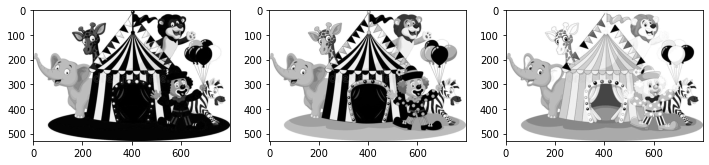

In [4]:
import cv2
import matplotlib.pyplot as plt

circo = cv2.imread('img/circo.jpg')
circo_r, circo_g, circo_b = cv2.split(circo)

plt.figure(figsize=(12,20))
plt.subplot(131)
plt.imshow(circo[:,:,0], cmap='gray') #vermelho
plt.subplot(132)
plt.imshow(circo[:,:,1], cmap='gray') #verde
plt.subplot(133)
plt.imshow(circo[:,:,2], cmap='gray') #azul

plt.show()


**Exercício 2**: Usando a célula abaixo, mostre o video de sua webcam com as cores "invertidas" (RGB em vez de BGR), e com a imagem transposta. 

In [ ]:
import cv2
import matplotlib.pyplot as plt

video = cv2.imread("video")
video_rgb = cv2.cvtColor(video, cv2.COLOR_BGR2RGB)
type(mini_grid_rgb)

mini_grid_rgb.shape